In [1]:
import perfume
import perfume.analyze
import pandas as pd
import bokeh.io
bokeh.io.output_notebook()

Loading BokehJS ...

In [2]:
import time
import numpy as np

def test_function_1():
    good = np.random.poisson(20)
    bad = np.random.poisson(100)
    msec = np.random.choice([good, bad], p=[.99, .01])
    time.sleep(msec / 3000.)

def test_function_2():
    good = np.random.poisson(5)
    bad = np.random.poisson(150)
    msec = np.random.choice([good, bad], p=[.95, .05])
    time.sleep(msec / 3000.)

def test_function_3():
    msec = max(1, np.random.normal(100, 10))
    time.sleep(msec / 3000.)

numbers = np.arange(0, 1, 1. / (3 * 5000000))

def test_function_4():
    return np.sum(numbers)

samples = None

In [3]:
samples = perfume.bench(test_function_1, test_function_2, test_function_3, test_function_4,
                        efficiency=0.8, samples=samples)

function,test_function_1,test_function_2,test_function_3,test_function_4
count,205.000000,205.000000,205.000000,205.000000
mean,7.463273,3.063099,33.554550,11.681032
std,4.043638,7.686302,3.224669,2.017244
min,2.595714,0.190942,25.952696,7.719742
25%,5.929929,1.268061,31.414519,10.214458
50%,6.963235,1.898440,33.548153,11.862175
75%,7.949494,2.297554,35.652062,12.971311
max,41.247565,59.689613,42.599479,16.803125


In [4]:
perfume.analyze.cumulative_quantiles_plot(samples)

In [5]:
timings = perfume.analyze.timings(samples)
isolated = perfume.analyze.isolate(samples)
isolated.head()

function test_function_1            test_function_2           test_function_3  \
timing             begin        end           begin       end           begin   
0               0.000000   6.740170        0.000000  1.548885        0.000000   
1               6.740170  14.319411        1.548885  3.443883       33.229882   
2              14.319411  19.570303        3.443883  4.336571       63.266334   
3              19.570303  28.803035        4.336571  4.897202       99.129687   
4              28.803035  34.034439        4.897202  6.115643      133.514870   

function             test_function_4             
timing           end           begin        end  
0          33.229882        0.000000   9.251466  
1          63.266334        9.251466  18.500942  
2          99.129687       18.500942  27.849684  
3         133.514870       27.849684  37.606505  
4         164.990899       37.606505  46.755117

function,test_function_1,test_function_2,test_function_3,test_function_4
count,205.000000,205.000000,205.000000,205.000000
mean,7.463273,3.063099,33.554550,11.681032
std,4.043638,7.686302,3.224669,2.017244
min,2.595714,0.190942,25.952696,7.719742
25%,5.929929,1.268061,31.414519,10.214458
50%,6.963235,1.898440,33.548153,11.862175
75%,7.949494,2.297554,35.652062,12.971311
max,41.247565,59.689613,42.599479,16.803125


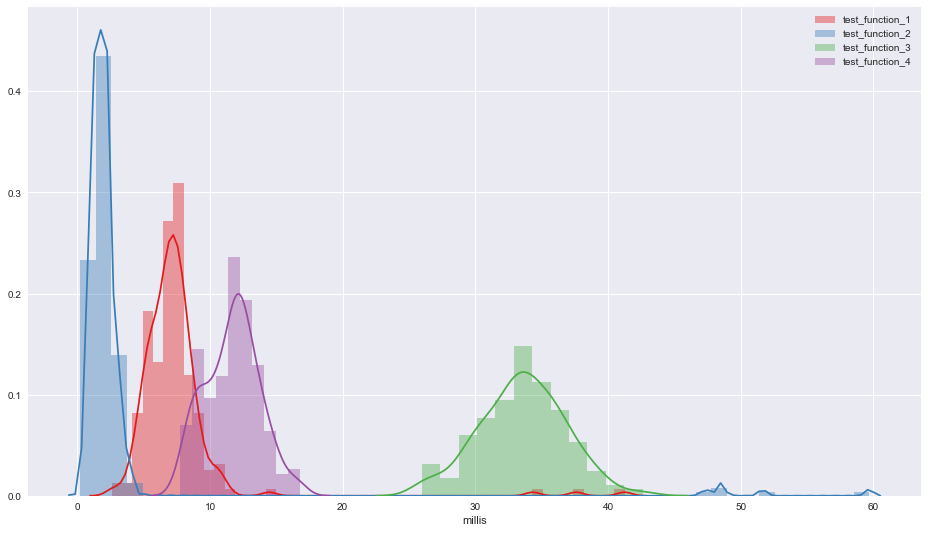

In [6]:
from bokeh import palettes
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(16, 9))
for col, color in zip(timings.columns, palettes.Set1[len(timings.columns)]):
    sns.distplot(timings[col], label=col, color=color, ax=ax)
ax.set_xlabel('millis')
ax.legend()
timings.describe()

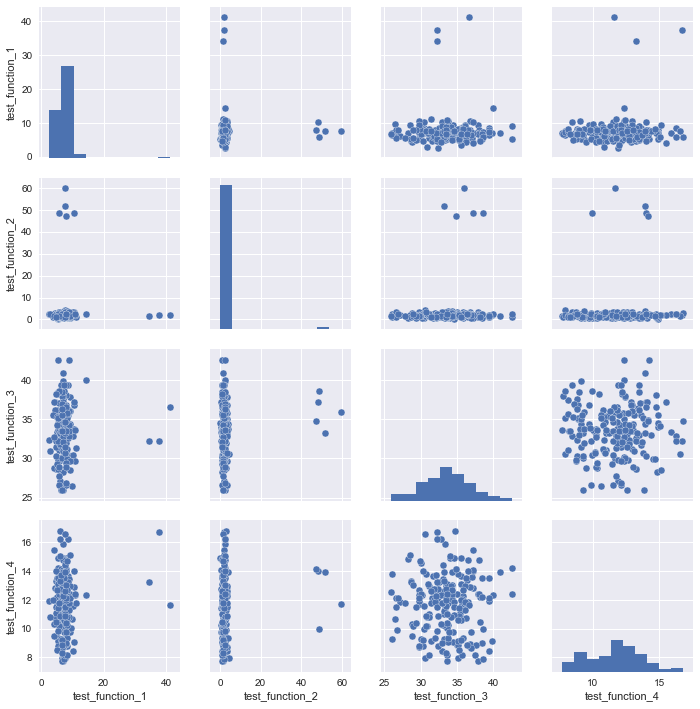

In [7]:
sns.pairplot(timings)